<a href="https://colab.research.google.com/github/chinhhadl-rgb/baocaottnt/blob/main/baocao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
from typing import Optional, Tuple
KICH_THUOC_TOI_THIEU = 3
KICH_THUOC_TOI_DA = 5
class BanCo:
    """Lớp biểu diễn bàn cờ N x N cho trò chơi Tic-Tac-Toe mở rộng."""

    def __init__(self, kich_thuoc: int):
        self.kich_thuoc = kich_thuoc
        self.o_trong = [[' ' for _ in range(kich_thuoc)] for _ in range(kich_thuoc)]

    def hien_thi(self) -> None:
        """Hiển thị bàn cờ ra màn hình."""
        for i in range(self.kich_thuoc):
            print(" | ".join(self.o_trong[i]))
            if i < self.kich_thuoc - 1:
                print("-" * (self.kich_thuoc * 4 - 3))

    def o_trong_tai(self, hang: int, cot: int) -> bool:
        """Kiểm tra ô (hang, cot) có trống không."""
        return self.o_trong[hang][cot] == ' '

    def dat_nuoc_di(self, hang: int, cot: int, ky_hieu: str) -> None:
        """Đặt ký hiệu vào ô (hang, cot)."""
        self.o_trong[hang][cot] = ky_hieu

    def huy_nuoc_di(self, hang: int, cot: int) -> None:
        """Hủy nước đi tại ô (hang, cot)."""
        self.o_trong[hang][cot] = ' '

    def ban_co_day(self) -> bool:
        """Kiểm tra bàn cờ đã đầy chưa."""
        return all(cell != ' ' for hang in self.o_trong for cell in hang)

    def kiem_tra_nguoi_thang(self) -> Optional[str]:
        """Kiểm tra xem có người thắng không, trả về ký hiệu thắng hoặc None."""
        n = self.kich_thuoc
        b = self.o_trong

        # Kiểm tra hàng
        for i in range(n):
            if b[i][0] != ' ' and all(b[i][j] == b[i][0] for j in range(n)):
                return b[i][0]

        # Kiểm tra cột
        for j in range(n):
            if b[0][j] != ' ' and all(b[i][j] == b[0][j] for i in range(n)):
                return b[0][j]

        # Kiểm tra đường chéo chính
        if b[0][0] != ' ' and all(b[i][i] == b[0][0] for i in range(n)):
            return b[0][0]

        # Kiểm tra đường chéo phụ
        if b[0][n-1] != ' ' and all(b[i][n-1-i] == b[0][n-1] for i in range(n)):
            return b[0][n-1]

        return None


class NguoiChoi:
    """Lớp cơ sở cho người chơi."""

    def __init__(self, ky_hieu: str):
        self.ky_hieu = ky_hieu

    def lay_nuoc_di(self, ban_co: BanCo) -> Tuple[int, int]:
        raise NotImplementedError("Phương thức này phải được ghi đè bởi lớp con.")


class NguoiChoiNgươi(NguoiChoi):
    """Người chơi là con người."""

    def lay_nuoc_di(self, ban_co: BanCo) -> Tuple[int, int]:
        n = ban_co.kich_thuoc
        while True:
            try:
                nhap = input(f"Nhập hàng (0-{n-1}): ").strip()
                if nhap.lower() in ['q', 'quit']:
                    print("Thoát trò chơi.")
                    sys.exit(0)
                hang = int(nhap)
                cot = int(input(f"Nhập cột (0-{n-1}): ").strip())

                if 0 <= hang < n and 0 <= cot < n and ban_co.o_trong_tai(hang, cot):
                    return hang, cot
                else:
                    print("Nước đi không hợp lệ! Ô đã bị chiếm hoặc ngoài phạm vi.")
            except ValueError:
                print("Vui lòng nhập số nguyên hợp lệ!")


class NguoiChoiAI(NguoiChoi):
    """Người chơi máy với thuật toán Minimax có cắt tỉa Alpha-Beta."""

    def __init__(self, ky_hieu: str):
        super().__init__(ky_hieu)
        self.ky_hieu_doi_thu = 'O' if ky_hieu == 'X' else 'X'

    def danh_gia(self, ban_co: BanCo) -> int:
        """Đánh giá trạng thái bàn cờ: +1 thắng, -1 thua, 0 hòa hoặc chưa kết thúc."""
        nguoi_thang = ban_co.kiem_tra_nguoi_thang()
        if nguoi_thang == self.ky_hieu:
            return 1
        if nguoi_thang == self.ky_hieu_doi_thu:
            return -1
        return 0

    def minimax(self, ban_co: BanCo, alpha: int, beta: int, la_luot_ai: bool) -> int:
        """Minimax với cắt tỉa alpha-beta."""
        diem = self.danh_gia(ban_co)
        if diem != 0 or ban_co.ban_co_day():
            return diem

        n = ban_co.kich_thuoc
        if la_luot_ai:
            diem_tot_nhat = -1000
            for i in range(n):
                for j in range(n):
                    if ban_co.o_trong_tai(i, j):
                        ban_co.dat_nuoc_di(i, j, self.ky_hieu)
                        diem_tot_nhat = max(diem_tot_nhat, self.minimax(ban_co, alpha, beta, False))
                        ban_co.huy_nuoc_di(i, j)
                        alpha = max(alpha, diem_tot_nhat)
                        if beta <= alpha:
                            return diem_tot_nhat
            return diem_tot_nhat
        else:
            diem_tot_nhat = 1000
            for i in range(n):
                for j in range(n):
                    if ban_co.o_trong_tai(i, j):
                        ban_co.dat_nuoc_di(i, j, self.ky_hieu_doi_thu)
                        diem_tot_nhat = min(diem_tot_nhat, self.minimax(ban_co, alpha, beta, True))
                        ban_co.huy_nuoc_di(i, j)
                        beta = min(beta, diem_tot_nhat)
                        if beta <= alpha:
                            return diem_tot_nhat
            return diem_tot_nhat

    def lay_nuoc_di(self, ban_co: BanCo) -> Tuple[int, int]:
        """Tìm nước đi tốt nhất cho AI."""
        diem_tot_nhat = -1000
        nuoc_di_tot_nhat = (-1, -1)
        n = ban_co.kich_thuoc

        for i in range(n):
            for j in range(n):
                if ban_co.o_trong_tai(i, j):
                    ban_co.dat_nuoc_di(i, j, self.ky_hieu)
                    diem_nuoc_di = self.minimax(ban_co, -1000, 1000, False)
                    ban_co.huy_nuoc_di(i, j)

                    if diem_nuoc_di > diem_tot_nhat:
                        diem_tot_nhat = diem_nuoc_di
                        nuoc_di_tot_nhat = (i, j)

        return nuoc_di_tot_nhat


class TroChoi:
    """Lớp quản lý toàn bộ trò chơi."""

    def __init__(self):
        self.kich_thuoc = self.nhap_kich_thuoc()
        self.ban_co = BanCo(self.kich_thuoc)
        self.nguoi_choi_nguoi = NguoiChoiNgươi('O')
        self.nguoi_choi_ai = NguoiChoiAI('X')

    def nhap_kich_thuoc(self) -> int:
        """Yêu cầu người dùng nhập kích thước bàn cờ hợp lệ."""
        while True:
            try:
                n = int(input(f"Nhập kích thước bàn cờ ({KICH_THUOC_TOI_THIEU}-{KICH_THUOC_TOI_DA}): "))
                if KICH_THUOC_TOI_THIEU <= n <= KICH_THUOC_TOI_DA:
                    return n
                else:
                    print(f"Vui lòng nhập số từ {KICH_THUOC_TOI_THIEU} đến {KICH_THUOC_TOI_DA}!")
            except ValueError:
                print("Vui lòng nhập một số nguyên!")

    def choi(self) -> None:
        """Vòng lặp chính của trò chơi."""
        luot = 'X'  # AI đi trước

        while True:
            print("\n" + "="*30)
            self.ban_co.hien_thi()
            print("="*30)

            if luot == 'X':
                print("Lượt của Máy (X)... đang suy nghĩ...")
                hang, cot = self.nguoi_choi_ai.lay_nuoc_di(self.ban_co)
            else:
                print("Lượt của Bạn (O)")
                hang, cot = self.nguoi_choi_nguoi.lay_nuoc_di(self.ban_co)

            self.ban_co.dat_nuoc_di(hang, cot, luot)

            nguoi_thang = self.ban_co.kiem_tra_nguoi_thang()
            if nguoi_thang:
                print("\n" + "="*30)
                self.ban_co.hien_thi()
                print("="*30)
                if nguoi_thang == 'X':
                    print("Máy thắng! Chúc mừng trí tuệ nhân tạo! 🤖")
                else:
                    print("Bạn đã thắng! Chúc mừng! 🎉")
                break

            if self.ban_co.ban_co_day():
                print("\n" + "="*30)
                self.ban_co.hien_thi()
                print("="*30)
                print("Hòa! Không ai thắng.")
                break

            luot = 'O' if luot == 'X' else 'X'

        # Hỏi chơi lại
        while True:
            choi_lai = input("\nBạn có muốn chơi lại? (c/k): ").strip().lower()
            if choi_lai in ['c', 'co', 'yes', 'y']:
                TroChoi().choi()
                return
            elif choi_lai in ['k', 'khong', 'no', 'n']:
                print("Cảm ơn bạn đã chơi! Tạm biệt! 👋")
                return
            else:
                print("Vui lòng trả lời 'c' (có) hoặc 'k' (không).")


if __name__ == "__main__":
    print("Chào mừng bạn đến với trò chơi Tic-Tac-Toe N x N!")
    print("Máy sẽ là X (đi trước), bạn là O.")
    print("Nhập 'q' bất kỳ lúc nào để thoát.\n")
    TroChoi().choi()

Chào mừng bạn đến với trò chơi Tic-Tac-Toe N x N!
Máy sẽ là X (đi trước), bạn là O.
Nhập 'q' bất kỳ lúc nào để thoát.

Nhập kích thước bàn cờ (3-5): 3

  |   |  
---------
  |   |  
---------
  |   |  
Lượt của Máy (X)... đang suy nghĩ...

X |   |  
---------
  |   |  
---------
  |   |  
Lượt của Bạn (O)
Nhập hàng (0-2): 11
Nhập cột (0-2): 2
Nước đi không hợp lệ! Ô đã bị chiếm hoặc ngoài phạm vi.
Nhập hàng (0-2): 1
Nhập cột (0-2): 1

X |   |  
---------
  | O |  
---------
  |   |  
Lượt của Máy (X)... đang suy nghĩ...

X | X |  
---------
  | O |  
---------
  |   |  
Lượt của Bạn (O)
Nhập hàng (0-2): 0
Nhập cột (0-2): 1
Nước đi không hợp lệ! Ô đã bị chiếm hoặc ngoài phạm vi.
Nhập hàng (0-2): 0
Nhập cột (0-2): 2

X | X | O
---------
  | O |  
---------
  |   |  
Lượt của Máy (X)... đang suy nghĩ...

X | X | O
---------
  | O |  
---------
X |   |  
Lượt của Bạn (O)
Nhập hàng (0-2): 0
Nhập cột (0-2): 0
Nước đi không hợp lệ! Ô đã bị chiếm hoặc ngoài phạm vi.
Nhập hàng (0-2): 2
Nhập cột

CHƯƠNG TRÌNH ĐỒ THỊ – OOP
1 → Tô màu đồ thị
2 → Bài toán người bán hàng (TSP)
👉 Chọn (1 hoặc 2): 2

Upload file dữ liệu:


Saving duongdi.txt to duongdi (2).txt
KẾT QUẢ BÀI TOÁN TSP
Chu trình tối ưu:
Hà Nội → Hải Phòng → Huế → Đà Lạt → Hội An → Vũng Tàu → Nha Trang → Cần Thơ → Đà Nẵng → TP.HCM → Hà Nội → Hà Nội
Tổng chi phí: 5690 km



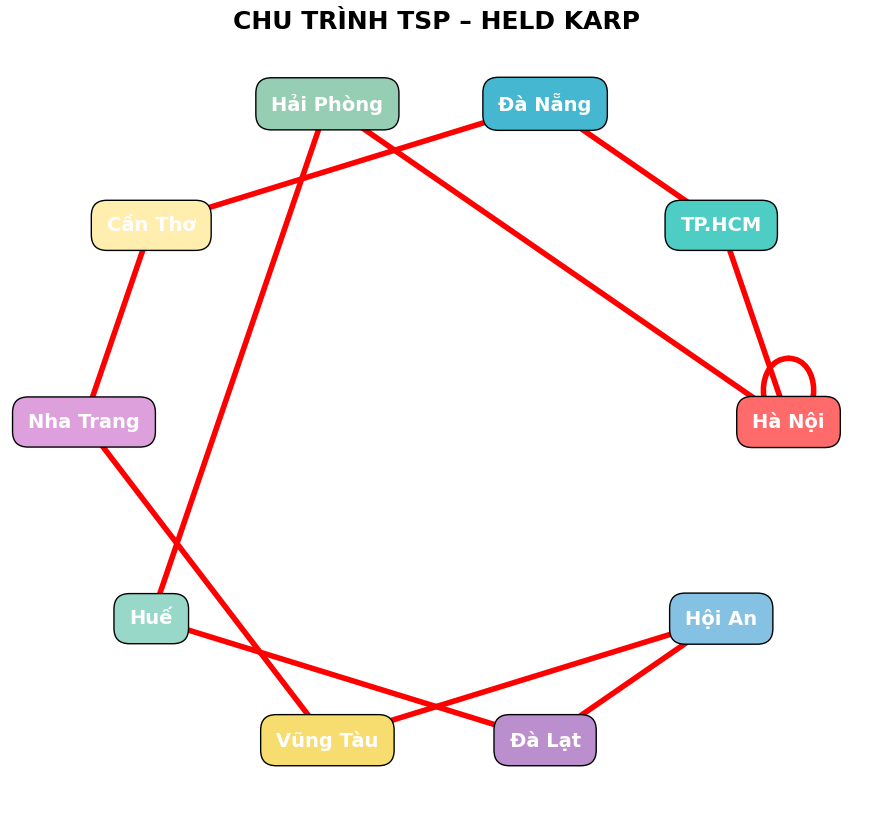

In [22]:
import networkx as nx
import matplotlib.pyplot as plt
from google.colab import files
from typing import List, Tuple
%matplotlib inline
MAU_DINH = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FFEEAD',
            '#DDA0DD', '#98D8C8', '#F7DC6F', '#BB8FCE', '#85C1E2']
TEN_THANH_PHO = ["Hà Nội", "TP.HCM", "Đà Nẵng", "Hải Phòng", "Cần Thơ",
                 "Nha Trang", "Huế", "Vũng Tàu", "Đà Lạt", "Hội An",
                 "Hạ Long", "Quy Nhơn", "Phan Thiết", "Buôn Ma Thuột", "Pleiku"]
MAU_THANH_PHO = MAU_DINH + ['#FF9FF3', '#54A0FF', '#48DBFB', '#1DD1A1', '#FF9F43']
IN_DAM = "\033[1m"
KET_THUC = "\033[0m"
class GraphColoring:
    def __init__(self):
        self.graph = []
        self.colors = []
    def read_matrix(self, filename: str):
        with open(filename, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]
        if not lines:
            raise ValueError("File ma trận kề rỗng!")
        n = len(lines)
        self.graph = []
        for i, line in enumerate(lines):
            row = list(map(int, line.split()))
            if len(row) != n:
                raise ValueError(f"Lỗi dòng {i+1}")
            self.graph.append(row)
    def greedy_coloring(self):
        n = len(self.graph)
        self.colors = [-1] * n
        for u in range(n):
            used = set()
            for v in range(n):
                if self.graph[u][v] == 1 and self.colors[v] != -1:
                    used.add(self.colors[v])
            c = 0
            while c in used:
                c += 1
            self.colors[u] = c
    def show_result(self):
        print(f"{IN_DAM}KẾT QUẢ TÔ MÀU ĐỒ THỊ{KET_THUC}")
        for i, c in enumerate(self.colors):
            print(f"   Đỉnh {i:<2} → Màu {c}")
        print(f"\n Số màu sử dụng: {max(self.colors) + 1}\n")
    def draw_graph(self):
        n = len(self.graph)
        G = nx.Graph()
        G.add_nodes_from(range(n))
        for i in range(n):
            for j in range(i+1, n):
                if self.graph[i][j]:
                    G.add_edge(i, j)
        pos = nx.spring_layout(G, seed=42)
        node_colors = [MAU_DINH[c % len(MAU_DINH)] for c in self.colors]
        plt.figure(figsize=(10, 8))
        nx.draw(G, pos,
                node_color=node_colors,
                node_size=2800,
                with_labels=True,
                font_size=16,
                font_color='white',
                edge_color='black',
                width=2)
        plt.title(f"TÔ MÀU ĐỒ THỊ (GREEDY)\nSố màu = {max(self.colors) + 1}",
                  fontsize=18, fontweight='bold')
        plt.axis('off')
        plt.show()
class TSP:
    def __init__(self):
        self.dist = []
        self.cost = 0
        self.path = []
    def read_distance_matrix(self, filename: str):
        with open(filename, 'r', encoding='utf-8') as f:
            lines = [line.strip() for line in f if line.strip()]
        if not lines:
            raise ValueError("File ma trận khoảng cách rỗng!")
        self.dist = [list(map(int, line.split())) for line in lines]
    def held_karp(self):
        n = len(self.dist)
        INF = float('inf')
        dp = [[INF]*n for _ in range(1<<n)]
        parent = [[-1]*n for _ in range(1<<n)]
        dp[1][0] = 0
        for mask in range(1<<n):
            for u in range(n):
                if dp[mask][u] == INF:
                    continue
                for v in range(n):
                    if not mask & (1<<v) and self.dist[u][v] > 0:
                        nm = mask | (1<<v)
                        if dp[nm][v] > dp[mask][u] + self.dist[u][v]:
                            dp[nm][v] = dp[mask][u] + self.dist[u][v]
                            parent[nm][v] = u
        full = (1<<n) - 1
        self.cost = INF
        last = -1
        for i in range(1, n):
            if dp[full][i] + self.dist[i][0] < self.cost:
                self.cost = dp[full][i] + self.dist[i][0]
                last = i
        self.path = [0]
        mask = full
        u = last
        while u != -1:
            self.path.append(u)
            pu = parent[mask][u]
            mask ^= (1<<u)
            u = pu
        self.path.reverse()
    def show_result(self):
        ten = TEN_THANH_PHO[:len(self.dist)]
        print(f"{IN_DAM}KẾT QUẢ BÀI TOÁN TSP{KET_THUC}")
        print("Chu trình tối ưu:")
        print(" → ".join(ten[i] for i in self.path) + f" → {ten[0]}")
        print(f"Tổng chi phí: {self.cost} km\n")
    def draw_tour(self):
        n = len(self.dist)
        ten = TEN_THANH_PHO[:n]
        G = nx.complete_graph(n)
        pos = nx.circular_layout(G)
        plt.figure(figsize=(11, 10))
        for i in range(n):
            x, y = pos[i]
            plt.text(x, y, ten[i],
                     ha='center', va='center', color='white',
                     fontsize=14, fontweight='bold',
                     bbox=dict(facecolor=MAU_THANH_PHO[i], boxstyle='round,pad=0.8'))
        edges = [(self.path[i], self.path[(i+1)%len(self.path)]) for i in range(len(self.path))]
        nx.draw_networkx_edges(G, pos, edgelist=edges,
                               edge_color='red', width=4, arrows=True)
        plt.title("CHU TRÌNH TSP – HELD KARP",
                  fontsize=18, fontweight='bold')
        plt.axis('off')
        plt.show()
class GraphApp:
    def run(self):
        print(f"{IN_DAM}CHƯƠNG TRÌNH ĐỒ THỊ – OOP{KET_THUC}")
        print("1 → Tô màu đồ thị")
        print("2 → Bài toán người bán hàng (TSP)")
        choice = input("👉 Chọn (1 hoặc 2): ").strip()
        print("\nUpload file dữ liệu:")
        uploaded = files.upload()
        filename = list(uploaded.keys())[0]
        if choice == "1":
            app = GraphColoring()
            app.read_matrix(filename)
            app.greedy_coloring()
            app.show_result()
            app.draw_graph()
        elif choice == "2":
            app = TSP()
            app.read_distance_matrix(filename)
            app.held_karp()
            app.show_result()
            app.draw_tour()
        else:
            print("❌ Lựa chọn không hợp lệ!")
GraphApp().run()
